In [2]:
import os
import torch
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde, kurtosis

def load_weight_list_by_tag(weight_list_dir, tag = "server"):
    if tag is None:
        tag = "server"
    weight_list_dir = os.path.join(weight_list_dir,tag)
    weight_list = []
    for file in sorted(os.listdir(weight_list_dir)):
        if file.endswith('.pt'):
            weight_path = os.path.join(weight_list_dir, file)
            weight = torch.load(weight_path)
            weight_list.append(weight)
    return weight_list


def filter_weight(weight_list, unselect_list = None, all_select_list = None, any_select_list = None):
    # filtered_weight_list = weight_list
    filtered_weight_list = []
    for weights_dict in weight_list:
        # filtered_weights = {layer_key: weights for layer_key, weights in weights_dict.items() if 'bn' not in layer_key and 'weight' in layer_key}
        
        filtered_weights = {layer_key: weights.cpu() if torch.is_tensor(weights) else weights for layer_key, weights in weights_dict.items() if
                            (unselect_list is None or all(unselected_key not in layer_key for unselected_key in unselect_list)) and 
                            (all_select_list is None or all(selected_key in layer_key for selected_key in all_select_list)) and
                            (any_select_list is None or any(selected_key in layer_key for selected_key in any_select_list))}
        filtered_weight_list.append(filtered_weights)
    return filtered_weight_list

In [3]:

def plot_histogram_with_curve(parameters):
    plt.figure(figsize=(10, 5))

    # 这里使用十六进制表示颜色，分别代表黄色、绿色和蓝色系的三种颜色
    colors = [['#FFD700', '#FFA500', '#FF8C00'], ['#00FF00', '#32CD32', '#008000'], ['#00FFFF', '#1E90FF', '#0000FF'], ['#F0D700', '#F0A500', '#F08C00']]

    # Convert odict_keys to list for compatibility
    # Iterate through all parameters
    i = 0
    for name, param in parameters.items():
        flat_params = param.flatten()
        # Plot histogram for current parameter
        # plt.hist(flat_params, bins=50, density=True, alpha=0.7, color=colors[i % len(colors)], label=name)
        color_idx = i // 3

        # Fit KDE curve to parameter
        kde_params = gaussian_kde(flat_params)
        x_vals = torch.linspace(flat_params.min(), flat_params.max(), 1000)
        plt.plot(x_vals.numpy(), kde_params(x_vals.numpy()), color=colors[color_idx][i % 3], linestyle='--', label=f'{name} (kurtosis: {kurtosis(flat_params.numpy(), fisher=False):.2f})')
        i+=1

    plt.title('Model Parameters Histograms with KDE')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
server_grad_list = load_weight_list_by_tag('grad_lists/202405081023/',"server")

In [23]:
client_grad_dict = {f'c{i}':load_weight_list_by_tag('grad_lists/20240507/',f'c{i}') for i in range(5)}

In [5]:
process_grad = server_grad_list

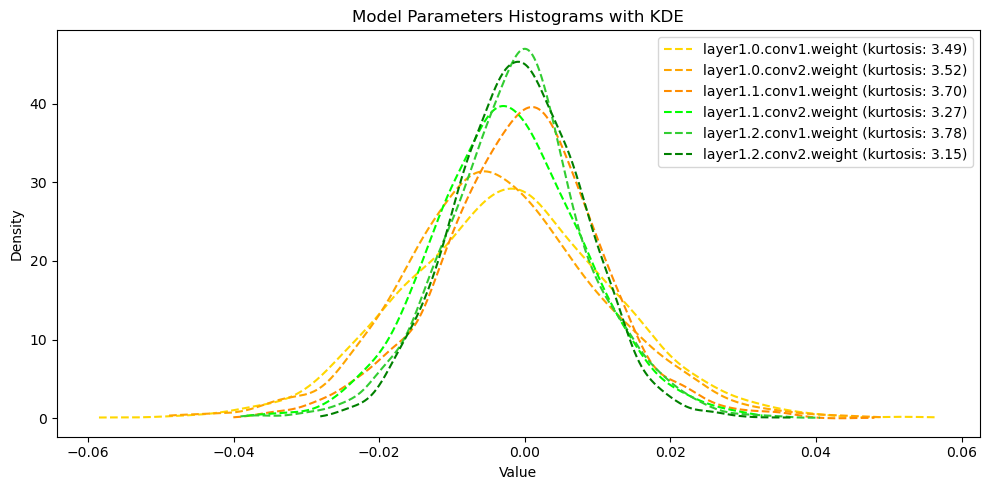

In [6]:
filtered_weight_list = filter_weight(process_grad, 
                                     unselect_list = ['bn'],
                                     all_select_list = ['weight', 'layer1'])
plot_histogram_with_curve(filtered_weight_list[0])


In [7]:

filtered_weight_list_layer2 = filter_weight(process_grad, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer2'])
filtered_weight_list_conv2 = filter_weight(process_grad, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'conv2'])
filtered_weight_list_layer1_0 = filter_weight(process_grad, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer1.0'])
filtered_weight_list_layer1_1 = filter_weight(process_grad, 
                                     unselect_list = ['bn', 'down'],
                                     all_select_list = ['weight', 'layer1.1'])

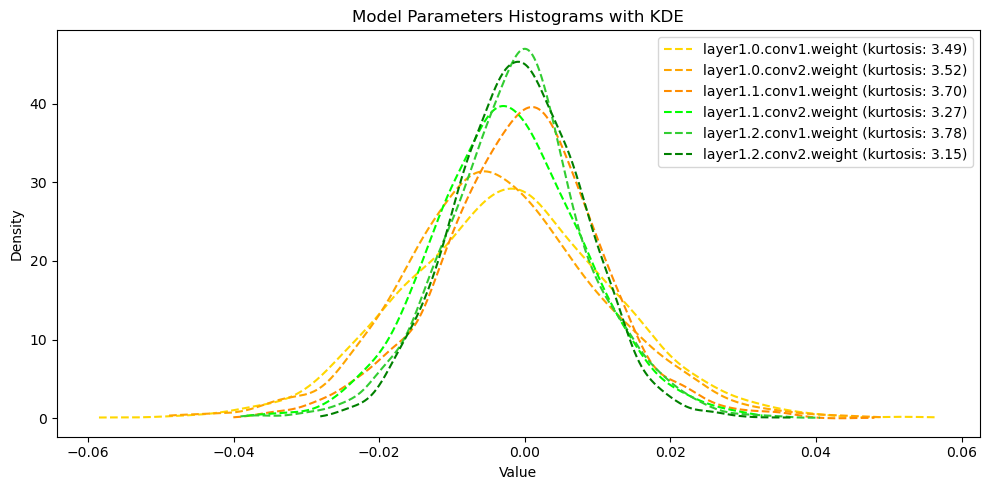

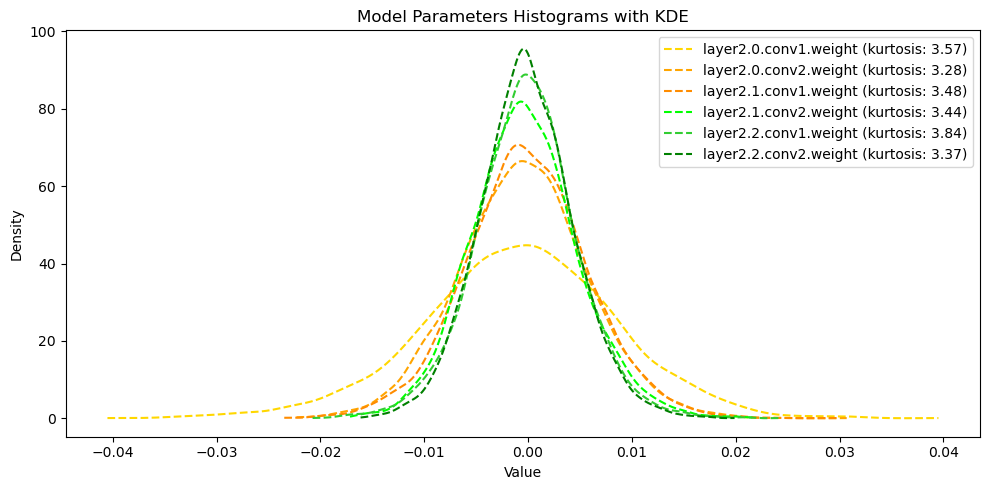

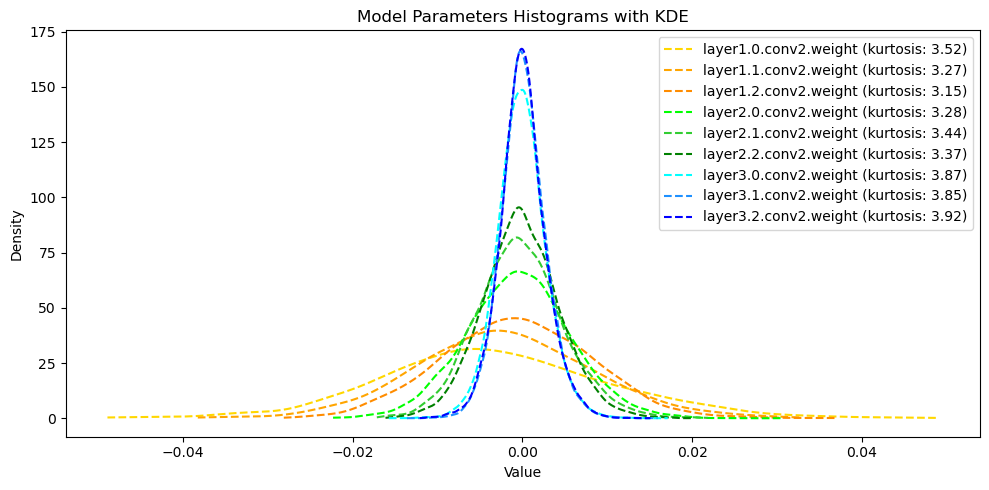

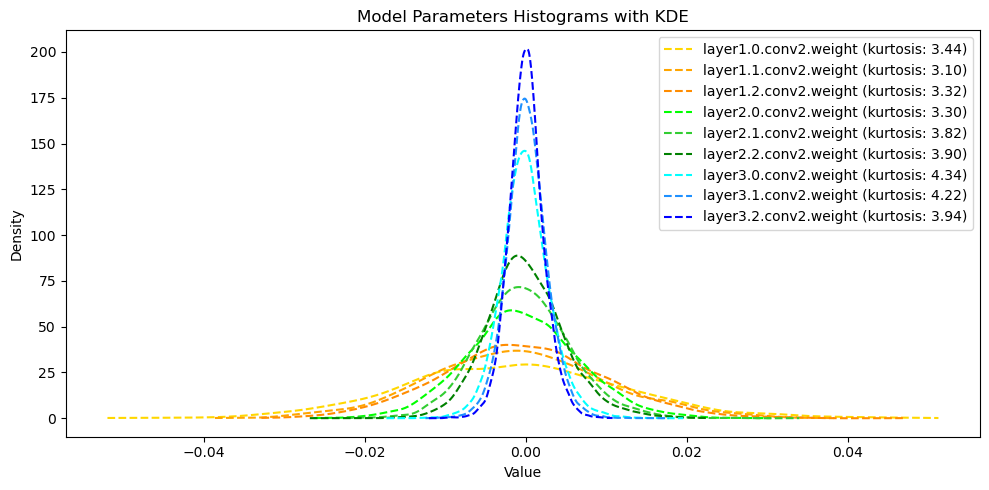

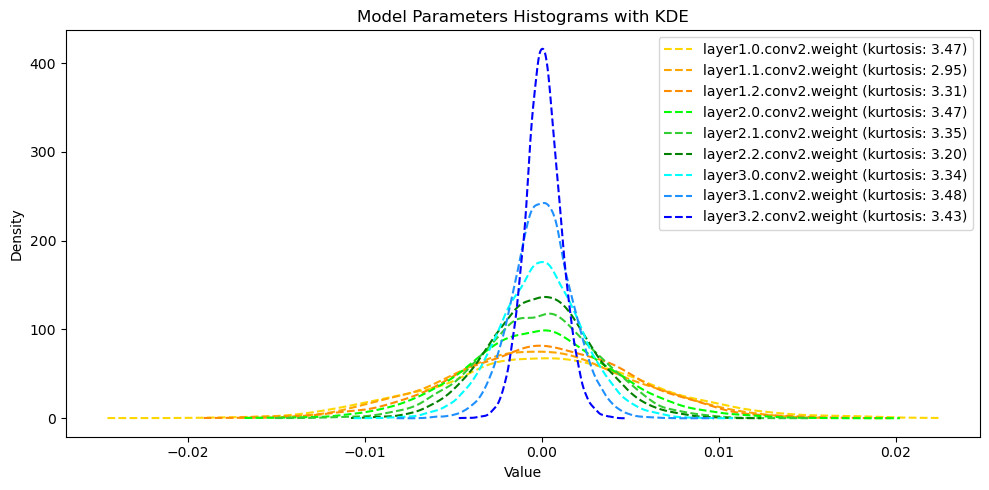

In [8]:
plot_histogram_with_curve(filtered_weight_list[0])
plot_histogram_with_curve(filtered_weight_list_layer2[0])
plot_histogram_with_curve(filtered_weight_list_conv2[0])
plot_histogram_with_curve(filtered_weight_list_conv2[1])
plot_histogram_with_curve(filtered_weight_list_conv2[2])

In [30]:
len(filtered_weight_list_conv2)

500

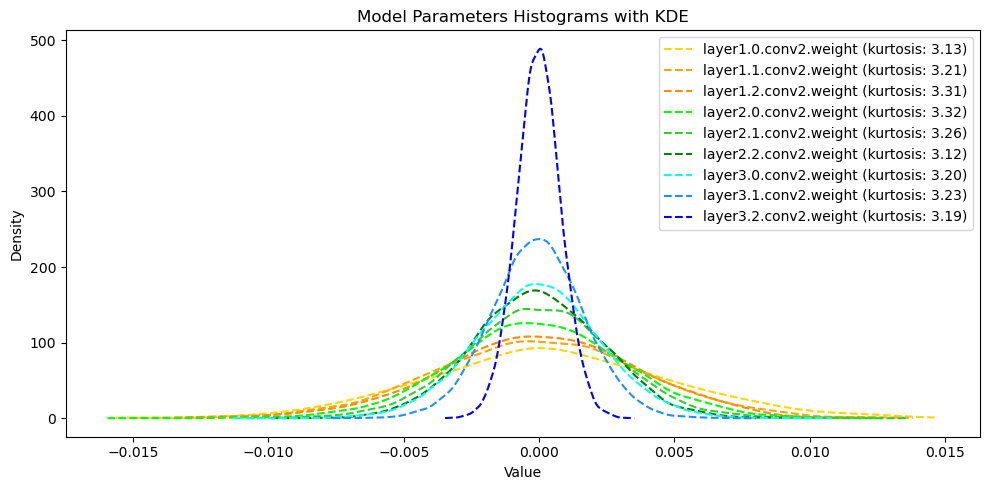

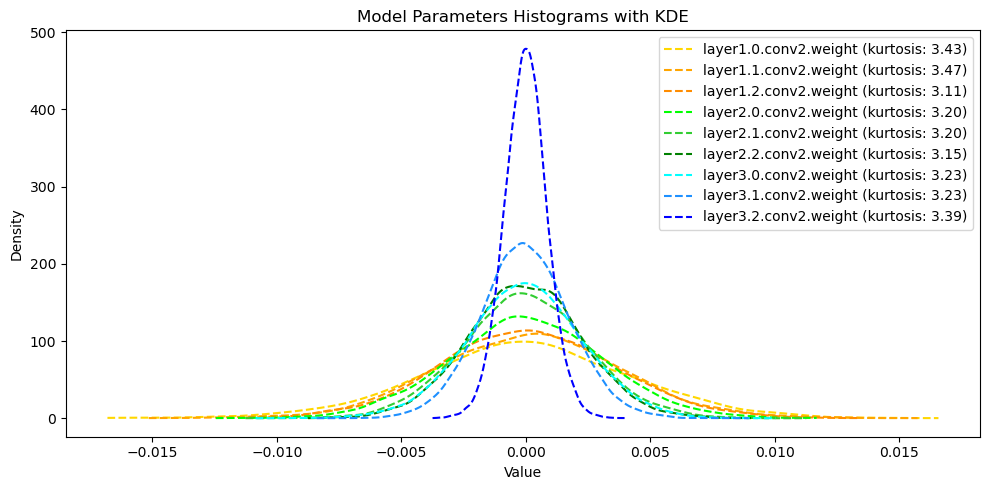

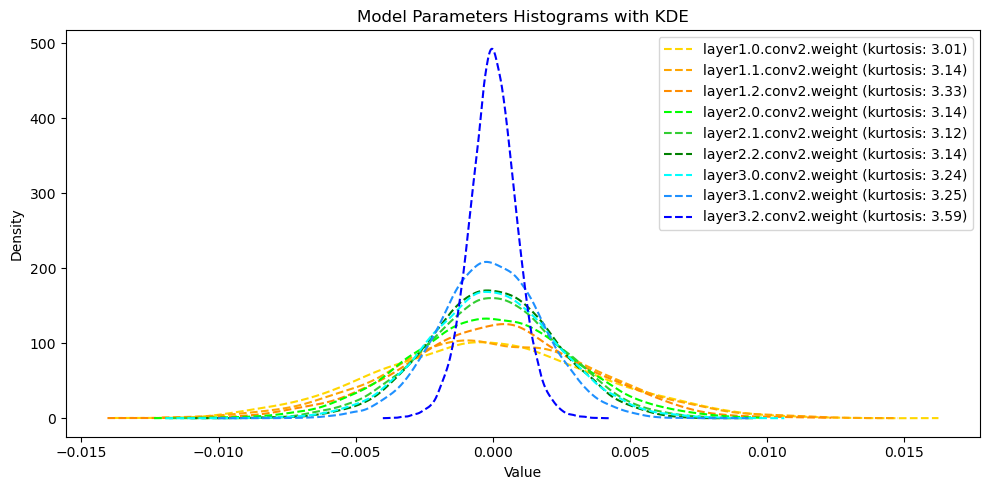

In [10]:
plot_histogram_with_curve(filtered_weight_list_conv2[30])
plot_histogram_with_curve(filtered_weight_list_conv2[60])
plot_histogram_with_curve(filtered_weight_list_conv2[90])

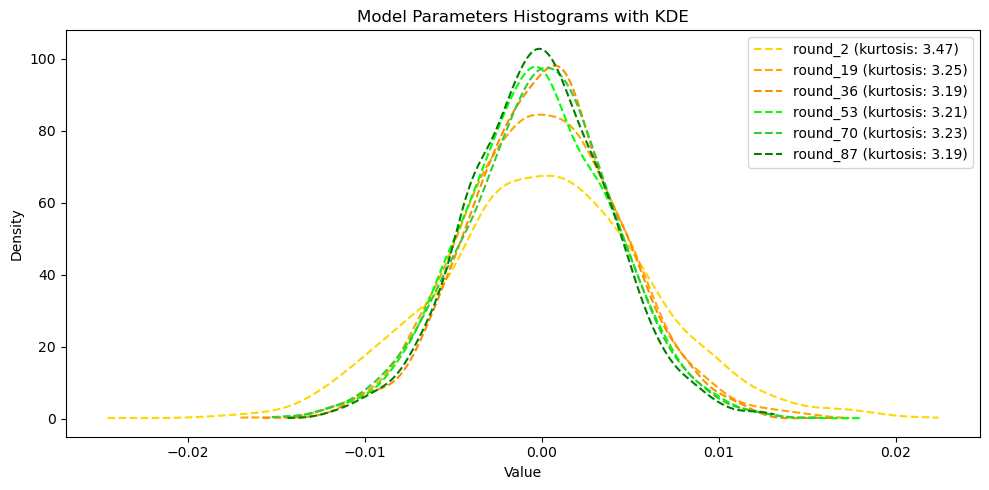

In [18]:
round_param_dict = {f'round_{round}': filtered_weight_list_conv2[round]['layer1.0.conv2.weight'] for round in range(2, 100, 17)}
plot_histogram_with_curve(round_param_dict)

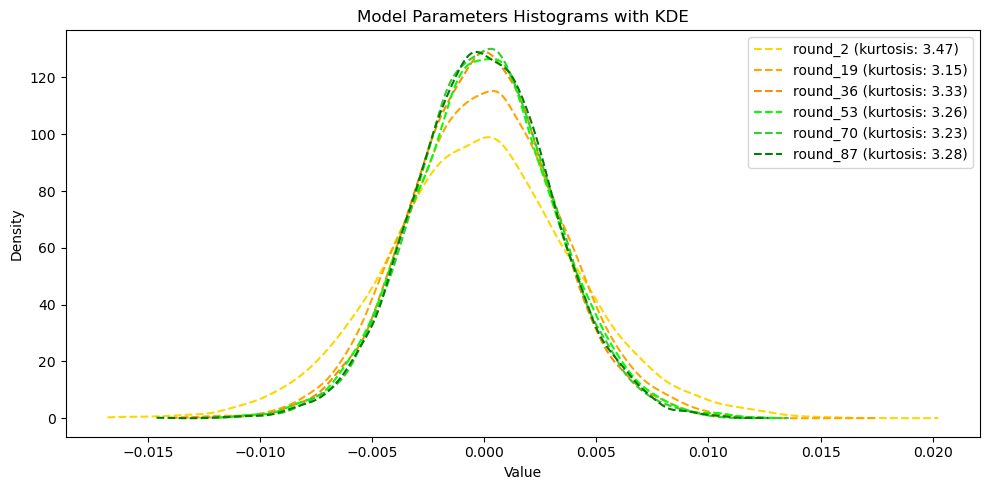

In [20]:
round_param_dict = {f'round_{round}': filtered_weight_list_conv2[round]['layer2.0.conv2.weight'] for round in range(2, 100, 17)}
plot_histogram_with_curve(round_param_dict)

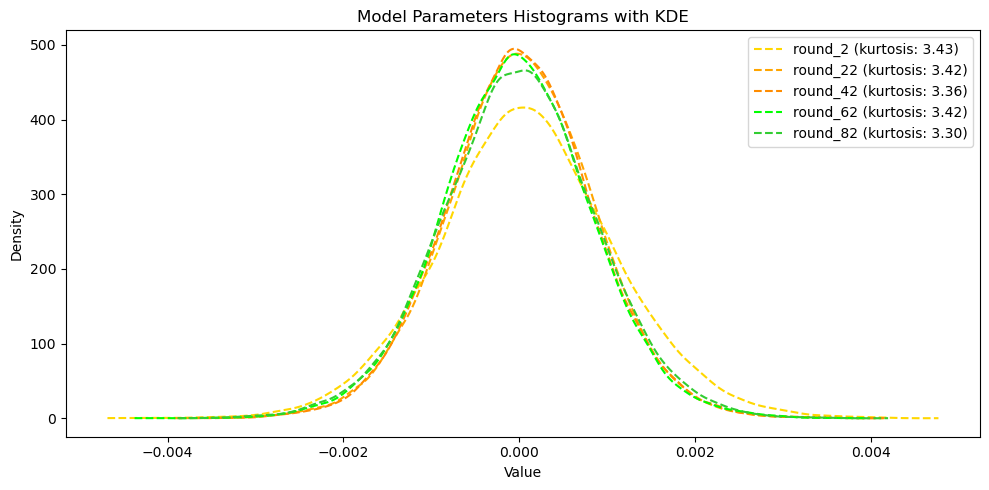

In [22]:
round_param_dict = {f'round_{round}': filtered_weight_list_conv2[round]['layer3.2.conv2.weight'] for round in range(2, 100, 20)}
plot_histogram_with_curve(round_param_dict)

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.2.conv1.weight', 'layer1.2.bn1.weight', 'layer1.2.bn1.bias', 'layer1.2.conv2.weight', 'layer1.2.bn2.weight', 'layer1.2.bn2.bias', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.1.conv1.weight', 'layer2.1.bn1.weight', 'layer2.1.bn1.bias', 'layer2.1.conv2.weight', 'layer2.1.bn2.weight', 'layer2.1.bn2.bias', 'layer2.2.conv1.weight', 'layer2.2.bn1.weight', 'layer2.2.bn1.bias', 'layer2.2.conv2.weight', 'layer2.2.bn2.weight', 'layer2.2.bn2.bias', 'layer3.0.conv1.weight',

In [ ]:
def plot_k_round(param):
    flat_params = param.flatten()
    kurtosis(flat_params.numpy(), fisher=False)

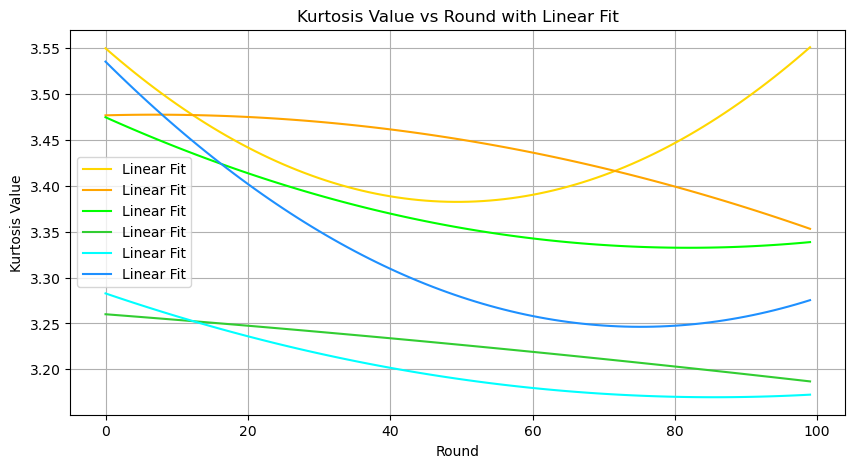

In [23]:
import numpy as np
values1 = [kurtosis(process_grad[round]['layer1.0.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]
values2 = [kurtosis(process_grad[round]['layer1.1.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]
values3 = [kurtosis(process_grad[round]['layer2.0.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]
values4 = [kurtosis(process_grad[round]['layer2.1.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]
values5 = [kurtosis(process_grad[round]['layer3.0.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]
values6 = [kurtosis(process_grad[round]['layer3.1.conv1.weight'].flatten().cpu(), fisher=False) for round in range(len(filtered_weight_list_conv2))]

# 创建round的列表
rounds = range(len(values1))
plt.figure(figsize=(10, 5))

# 绘制散点图
# plt.scatter(rounds, values1, label='Data')
colors = [['#FFD700', '#FFA500', '#FF8C00'], ['#00FF00', '#32CD32', '#008000'], ['#00FFFF', '#1E90FF', '#0000FF']]
# 进行最小二乘法拟合
fit_line_1 = np.poly1d(np.polyfit(rounds, values1, 2))
fit_line_2 = np.poly1d(np.polyfit(rounds, values2, 2))
fit_line_3 = np.poly1d(np.polyfit(rounds, values3, 2))
fit_line_4 = np.poly1d(np.polyfit(rounds, values4, 2))
fit_line_5 = np.poly1d(np.polyfit(rounds, values5, 2))
fit_line_6 = np.poly1d(np.polyfit(rounds, values6, 2))

# 绘制拟合直线
plt.plot(rounds, fit_line_1(rounds), color=colors[0][0], label='Linear Fit')
plt.plot(rounds, fit_line_2(rounds), color=colors[0][1], label='Linear Fit')
plt.plot(rounds, fit_line_3(rounds), color=colors[1][0], label='Linear Fit')
plt.plot(rounds, fit_line_4(rounds), color=colors[1][1], label='Linear Fit')
plt.plot(rounds, fit_line_5(rounds), color=colors[2][0], label='Linear Fit')
plt.plot(rounds, fit_line_6(rounds), color=colors[2][1], label='Linear Fit')

plt.xlabel('Round')
plt.ylabel('Kurtosis Value')
plt.title('Kurtosis Value vs Round with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()